In [11]:
import json
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

from dredFISH.Analysis.__init__plots import *
from dredFISH.Analysis import basicu 
# from dredFISH.Analysis import powerplots
# from dredFISH.Design.model import *
from dredFISH.Design.allen_data_iterators import DataIterCached

In [108]:
dat_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/' #02_reduced_class_longiter/'
!ls $dat_dir

dat_dir = dat_dir + '06-gene140_lmd01.00e+05'
# fig_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/figures'

00_test_recon		     05-1_drprt0.6	      07-v2-crse-drprt0.1
01_test_recon		     05-1_drprt0.7	      07-v2-crse-drprt0.2
02-2_reduced_class_longiter  05-1_drprt0.8	      07-v2-crse-drprt0.3
02_reduced_class	     05-1_drprt0.9	      07-v2-fine-drprt0.0
03-1_gpu		     06-gene140		      07-v2-fine-drprt0.1
03-2_cpu		     06-gene140_lmd01.00e-01  07-v2-fine-drprt0.2
04-1_gpu		     06-gene140_lmd01.00e+01  07-v2-fine-drprt0.3
04-2_cpu		     06-gene140_lmd01.00e-03  07-v2-fine-drprt0.4
05-1_drprt0.0		     06-gene140_lmd01.00e+03  07-v2-fine-drprt0.5
05-1_drprt0.1		     06-gene140_lmd01.00e-05  07-v2-fine-drprt0.6
05-1_drprt0.2		     06-gene140_lmd01.00e+05  07-v2-fine-drprt0.7
05-1_drprt0.3		     07-crse		      07-v2-fine-drprt0.8
05-1_drprt0.4		     07-fine		      07-v2-fine-drprt0.9
05-1_drprt0.5		     07-v2-crse-drprt0.0


In [109]:
f = '/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference' + '/10X/genes.npy' 
tenx_genes = np.load(f)
f = '/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference' + '/SmartSeq/genes.npy' 
smrt_genes = np.load(f)

np.all(tenx_genes == smrt_genes)

genes = tenx_genes
genes.shape

(10861,)

# outputs
- embmat - a (ncell, nbit (24)) matrix
- model - a pytorch format
- results -- some summary statistics

- meta (what are these parameters?)
    - max-half_nrml-90000.0-1.27E+05-24-0-2.60E-09-0.01-1.0
    - max-half_nrml-90000.0-1.32E+05-24-0-3.40E-09-0.01-1.0
    
# input
- allen_data_iterator
    - original: `/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference`
    - cached: `/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference/cache/_2`

# the embmat

In [110]:
!ls $dat_dir

'embmat=max-half_nrml-90000.0-2.00E+05-24-0-1.00E-10-0.01-1.0.json'
'model=max-half_nrml-90000.0-2.00E+05-24-0-1.00E-10-0.01-1.0.pt'
'result=max-half_nrml-90000.0-2.00E+05-24-0-1.00E-10-0.01-1.0.json'


In [111]:
# f = os.path.join(dat_dir, 'embmat=max-half_nrml-90000.0-2.00E+05-24-0-1.00E-10-0.01-1.0.json')
f = glob.glob(os.path.join(dat_dir, 'embmat*'))[0]
print(f)
              
with open(f, 'r') as fh:
    embmat = json.load(fh)
    embmat = np.array(embmat)
    print(embmat.shape)

/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/06-gene140_lmd01.00e+05/embmat=max-half_nrml-90000.0-2.00E+05-24-0-1.00E-10-0.01-1.0.json
(10861, 24)


# the results (statistics)

In [112]:
f = glob.glob(os.path.join(dat_dir, 'result*'))[0]
print(f)

with open(f, 'r') as fh:
    res = json.load(fh)
    # res = np.array(res)
    # print(res.shape)
list(res.keys())
list(res['0'].keys())

/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/06-gene140_lmd01.00e+05/result=max-half_nrml-90000.0-2.00E+05-24-0-1.00E-10-0.01-1.0.json


['smrt_crse_acc',
 'smrt_fine_acc',
 'smrt_rcn_lss',
 'smrt_mrgn_lss',
 'tenx_crse_acc',
 'tenx_fine_acc',
 'tenx_rcn_lss',
 'tenx_mrgn_lss',
 'dsc_lss',
 'row_cnst']

In [113]:
# res['0']['smrt_rcn_lss']
# res['0']['smrt_fine_acc']

In [114]:
_x = []
_y1 = []
_y2 = []
_y3 = []
_y4 = []

_y5 = []
_y6 = []

_y7 = []
_y8 = []

_y9 = []
_y10 = []
for _iter in res.keys():
    _x.append(_iter)
    _y1.append(np.mean([val for key, val in res[_iter]['smrt_crse_acc'].items()]))
    _y2.append(np.mean([val for key, val in res[_iter]['tenx_crse_acc'].items()]))
    _y3.append(np.mean([val for key, val in res[_iter]['smrt_fine_acc'].items()]))
    _y4.append(np.mean([val for key, val in res[_iter]['tenx_fine_acc'].items()]))
    
    _y5.append(res[_iter]['dsc_lss'])
    _y6.append(res[_iter]['row_cnst'])
    
    _y7.append(np.mean([val for key, val in res[_iter]['smrt_mrgn_lss'].items()]))
    _y8.append(np.mean([val for key, val in res[_iter]['tenx_mrgn_lss'].items()]))
    
    _y7.append(np.mean([val for key, val in res[_iter]['smrt_mrgn_lss'].items()]))
    _y8.append(np.mean([val for key, val in res[_iter]['tenx_mrgn_lss'].items()]))
    
    _y9.append(np.mean([val for key, val in res[_iter]['smrt_rcn_lss'].items()]))
    _y10.append(np.mean([val for key, val in res[_iter]['tenx_rcn_lss'].items()]))

_x = np.array(_x).astype(int)

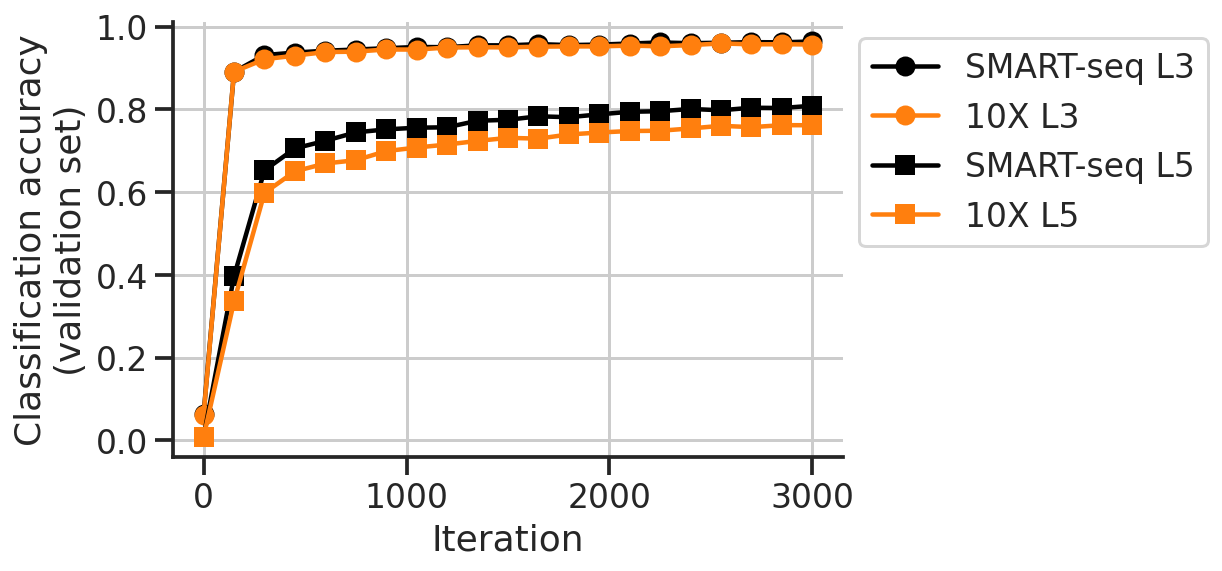

In [115]:
fig, ax = plt.subplots()
ax.plot(_x, _y1, '-o', color='k', label='SMART-seq L3')
ax.plot(_x, _y2, '-o', color='C1', label='10X L3' )
ax.plot(_x, _y3, '-s', color='k', label='SMART-seq L5')
ax.plot(_x, _y4, '-s', color='C1', label='10X L5' )
ax.set_xlabel('Iteration')
ax.set_ylabel('Classification accuracy\n(validation set)')
ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
# powerplots.savefig_autodate(fig, os.path.join(fig_dir, "NN_classification_acc.pdf"))
plt.show()

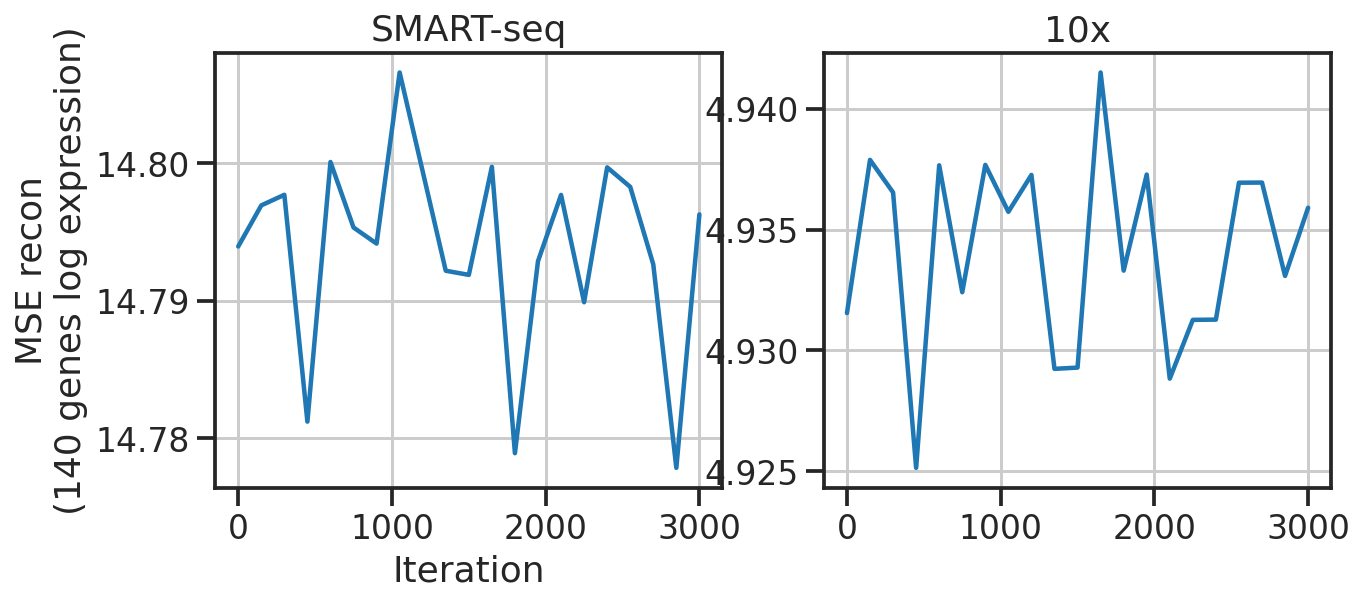

In [116]:
fig, axs = plt.subplots(1,2,figsize=(2*5,1*4))
ax = axs[0]
ax.plot(_x, _y9, '-')
ax.set_title('SMART-seq')
ax.set_xlabel('Iteration')
ax.set_ylabel('MSE recon\n(140 genes log expression)')

ax = axs[1]
ax.plot(_x, _y10, '-')
ax.set_title('10x')

plt.show()


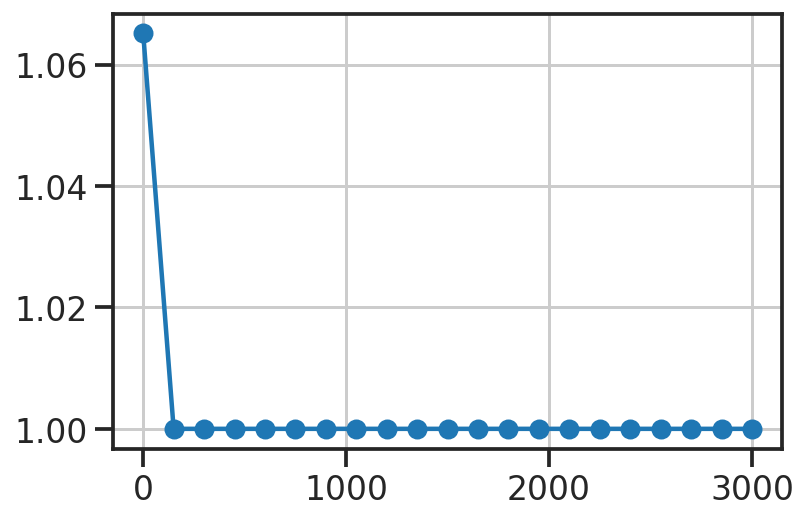

In [95]:
plt.plot(_x, _y5, '-o')

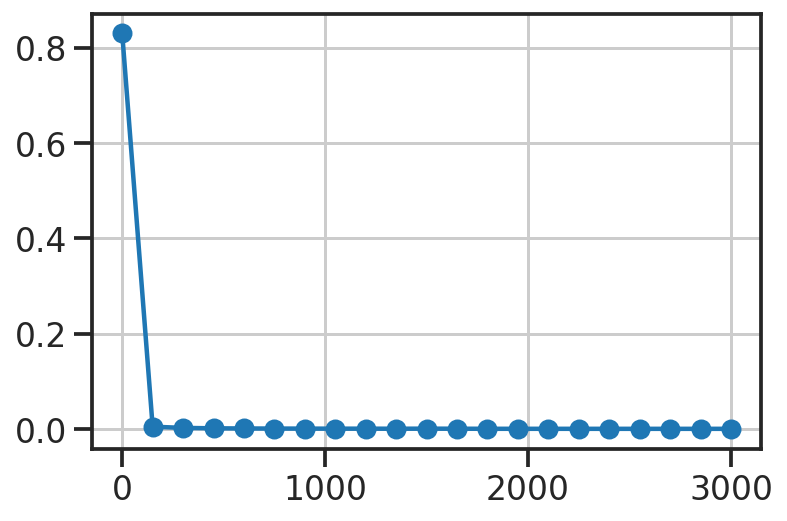

In [96]:
plt.plot(_x, _y6, '-o') # how to interpret this? how about dsc_acc???

In [97]:
# plt.plot(_x, _y7, '-o')
# plt.plot(_x, _y8, '-o')